<a href="https://colab.research.google.com/github/marianogoes/PCD/blob/main/Alumno_Clustering_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering o agrupamiento

La idea principal de aplicar el clustering es para poder organizar los puntos que se dibujan en un plan en diferentes categorias o grupos. 

## K medias

El algortimo de kmedias es uno de los mas simples y famosos ejemplos que podemos escuchar de los algoritmos de clustering. Estos son los pasos que se realizan para llevarlo a cabo:

- Se selecciona el numero de clusters k que pienses que es numero optimo.
- Se inicializan los k puntos como centroides de manera aleatoria dentro del espacio en donde estan distribuidos nuestros datos.
- Relacionamos cada observacion son el centroide mas cercano.
- Los centroides se actualizan al centro de todos los datos que se le atribuyeron en el paso anterior.
- Estos ultimos dos pasos se repetiran hasta que todos los centroides esten estables.





A continuacion utilizaremos las herramientas que vimos en la clase asada para generar datos dummy y ejemplificar el uso del clustering.

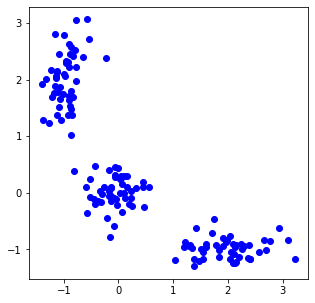

In [59]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo');

In [60]:
from scipy.spatial.distance import cdist

# Randomly allocate the 3 centroids 
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # Calculating the distance from a point to a centroid
    distances = cdist(X, centroids)
    # Checking what's the closest centroid for the point
    labels = distances.argmin(axis=1)
    
    # Labeling the point according the point's distance
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)
    
    cent_history.append(centroids)

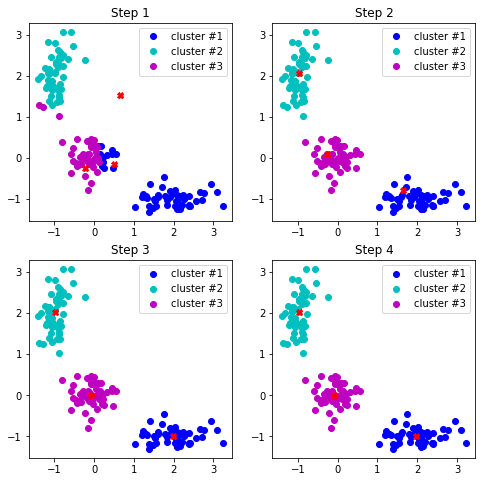

In [61]:
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)
    
    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1));

In [63]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Como vemos comunmente, en este ejemplo utilizamos la medida de distancia euclidiana (el algoritmo va a converger con cualquier otra metrica). Algunas de las caracteristicas que puedes tomar en cuenta para poder mejorar o cambiar tus resultados es el criterio de convergencia o la medida de distancia que utilizas entre los puntos de los datos y los centroides.

### ¿Como podemos eleguir el criterio de numero de clusters?

Haciendo contraste con herramientas de aprendizaje supervisado, en donde tenemos problemas de clasificacion o regresion, el agrupamiento requiere mas esfuerzo para elegir el criterio de optimizacion. Usualmente, cuando se trabaja con kmedias, debemos de optimizar la suma de las distancias cuadradas entre las observaciones o puntos y sus centroides. Para esto tenemos la siguiente formula:

\begin{align}
        J(C) = \sum_{k=1}^K \sum_{i \in C_k}|| x_i - \mu_k || \rightarrow \min_C
\end{align}

En donde interpretamos a C como el conjunto de clusters a la potencia k. $\mu_k$ es el centroide de un cluster $C_k$.

Esta definicion pareceria estar correcta, sin embargo, sin restriccion, el optimo se alcanza cuando el numero de centroides sea igual al numero de observaciones, por lo que cada uno de los puntos terminaria con su propio cluster. Para evitar sto, tenemos la funcion:

\begin{align}
        D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1} - J(C_k))|} \rightarrow \min_k
\end{align}

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, '$J(C_k)$')

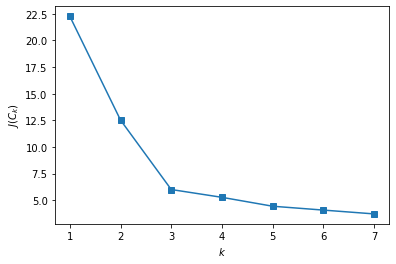

In [ ]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

Con esta funcion vemos que $J(C_k)$ llega hasta el punto 3, en donde a partir de ahi no tiene cambios grandes, por lo que podemos inferir que ese es el valor optimo de clusters.

Este tipo de problema es np-dificil, ya que su complejidad va en aumento dependiento de las dimensiones, los clusters y el numero de observaciones. La implementacion de este tipo de problema con sklearn tiene la ventaja de su funcion de inicializacion default nos ayuda a identificar centroides robustos. (Existen elementos de programacion en paralelo que tambien pueden implementarse en esta libreria que mejora el tiempo y capacidad computacional del problema).

Existe otra version del algoritmo llamado agrupacion aglomerativa. Esta se encuentra en una libreria llamada scipy. No entraremos a detalle, pero es una opcion que pueden explorar por su cuenta.

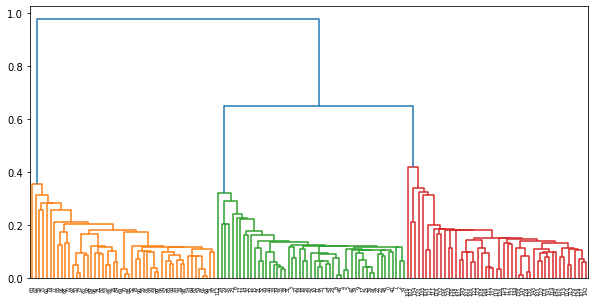

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

# pdist will calculate the upper triangle of the pairwise distance matrix
distance_mat = pdist(X) 
# linkage — is an implementation if agglomerative algorithm
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

# Practica:

Utilizando la libreria de sklearn y la base de datos de iris, realiza el proceso de kmeans. Recuerda que es importante que realices tambien la parte del PCA para reducir dimensiones.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/DataSets/Iris.csv')

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA    #algoritmo de PCA


In [4]:
from sklearn.cluster import KMeans


In [34]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [86]:
X=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y=data.Species

In [40]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, '$J(C_k)$')

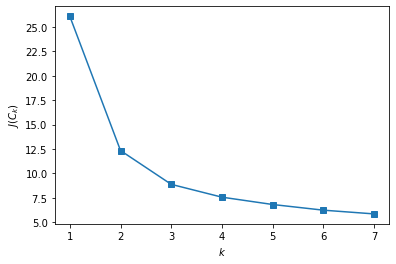

In [41]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

El último nivel de cambio considerable se da entre el 2 y el 3 valor de k por lo que se elegirá 3, ya que con 4 los recursos ya no estarían bien optimizados

In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [78]:
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
pca=PCA(.85)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:4]))

shape of X_pca (150, 2)
[0.72770452 0.23030523]
suma: 0.9580097536148197


In [79]:
kmeans = KMeans(n_clusters=3).fit(X_pca)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.61198392 -0.79925263]
 [-2.22019328  0.29222482]
 [ 1.71890108  0.65217008]]


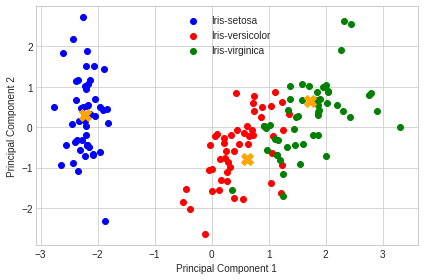

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), ('blue', 'red', 'green')):
        plt.scatter(X_pca[Y==lab, 0], X_pca[Y==lab, 1], label=lab, c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.plot(centroids[:, 0], centroids[:, 1], 'rX', color='orange', markersize=12)
    plt.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

.

##Conclusiones

Es claro que el centroide asociado a Iris-setosa es el mejor definido de los tres debido a que su grupo está más separado a los otros dos, de hecho el centroide ubicado cerca de versicolor tiene muchos verdes cercanos que podrían estar afectando en la clasificación